# Difficulty of Reading Level of
## of Academic and Popular and Psuedo scientific Language

In [1]:
LOAD_CACHED = False
import nltk
#help(nltk.NgramAssocMeasures)

In [2]:
import pickle
import matplotlib
#matplotlib.use('agg')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if LOAD_CACHED:
    with open('unraveled_links.p','rb') as handle:
        unravel = pickle.load(handle)
else:
    import dask.bag as db
    from t_analysis_purepy import web_iter, map_wrapper
    QUERY_LIST = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Neutron', 'Play Dough']
    list_per_links = map_wrapper(web_iter,QUERY_LIST) 
    remove_empty = [i for i in list_per_links if len(i)>0 ]
    unravel = []
    for i in remove_empty:
        unravel+=i
    with open('unraveled_links.p','wb') as handle:
        pickle.dump(unravel,handle)
import pandas as pd


/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
QUERY_LIST = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Neutron', 'Play Dough']
ENGINE_LIST = ['google_','gScholar_','bing_', 'duckduckgo_']


# Wrangle unwieldly dict of dicts and coerce into Pandas Data Frame
For a statistics and plotting friendly data base like type.


In [4]:
crude_text = [ f for f in unravel ] 
url_text = [ f['urlDat'] for f in unravel ] 
import pandas as pd
ct = pd.DataFrame(crude_text,columns=unravel[0].keys())
ctu = pd.DataFrame(url_text,columns=ct['urlDat'][0].keys())
import utils
#for 
for i, txt in enumerate(ct.index):   
    if utils.black_string(ct.iloc[i]['raw_text']) == True:
        print(ct.iloc[i]['raw_text'])

In [11]:
list(ctu.columns.values)
df2 = ctu.loc[ctu['keyword'] == 'Play Dough', ['fkg']]
ctu = ctu.drop(ctu[ctu.fkg > 100].index)
df2 = ctu.loc[ctu['keyword'] == 'Play Dough', ['fkg']]
print(df2)

      fkg
178   7.7
179   7.4
180  10.4
181  10.4
182   7.7
183   7.6
184   7.7
185   6.5
186   9.1
187  10.9
188  11.2
189  10.6
190  22.9
191   8.0
192   9.8
193   8.4
194  10.6
195  10.8
196   8.0
197  10.4
198   8.4
199  10.4
200  10.4
201   8.8
202  10.4
203   7.5
204   7.5
205  10.6
206   7.9
207   9.5
209  33.5
210  33.5
211  33.5
212  17.9
213  17.9
214  13.0
215   9.1
216   7.8
217   8.1
218   7.8
219   9.2
220   9.7
221   8.9
222   8.8
223   9.4
224   9.0
225   8.5


48 48
0 0
34 34
48 48
48 48
47 48


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


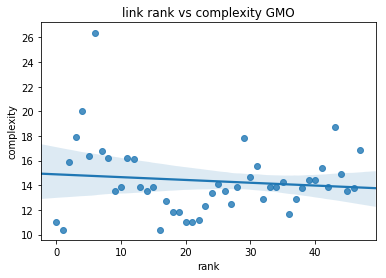

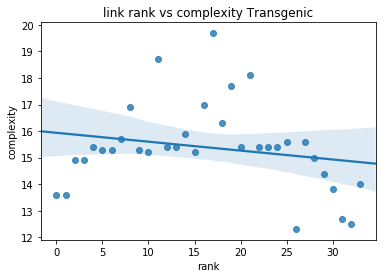

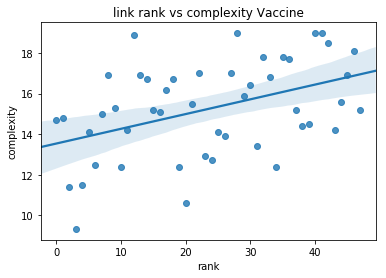

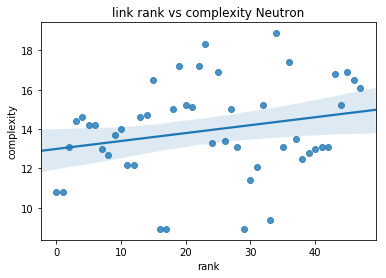

In [8]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
for outer,search_query in enumerate(QUERY_LIST):    

    #complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] == search_query ]
    complexity = ctu.loc[ctu['keyword'] == search_query, ['fkg']]
    complexity = complexity['fkg'].values

    
    rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] == search_query ]#and f['urlDat']['se'] == v ]
    print(len(complexity),len(rank))
    if len(complexity)>0 and len(rank)>0:
        if len(complexity)==len(rank):
            plt.figure()


            df = pd.DataFrame({'complexity': complexity,'rank': rank})
            plt.title(str('link rank vs complexity ')+str(search_query))
            ax = sns.regplot(x="rank",y="complexity", data=df)

#))
legend = ax.legend(loc='upper center', shadow=True)
plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
plt.show()       

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


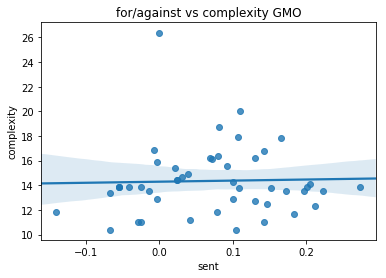

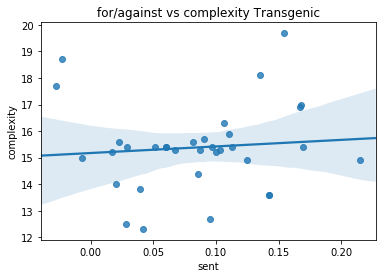

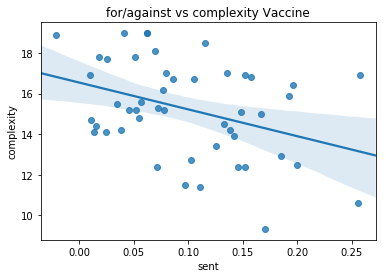

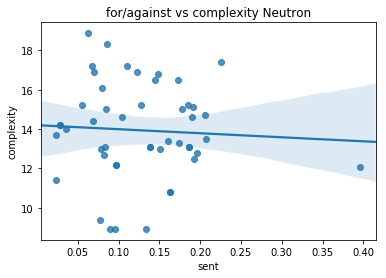

In [10]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
for outer,search_query in enumerate(QUERY_LIST):    
    #complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] == search_query ]
    complexity = ctu.loc[ctu['keyword'] == search_query, ['fkg']]
    complexity = complexity['fkg'].values
    sent = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] == search_query ]
    if len(complexity)>0 and len(sent)>0:
        if len(complexity)==len(sent):


            df = pd.DataFrame({'complexity': complexity,'sent': sent})
            plt.figure()
            plt.title(str('for/against vs complexity ')+str(search_query))
            ax = sns.regplot(x="sent",y="complexity", data=df)
legend = ax.legend(loc='upper center', shadow=True)
plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


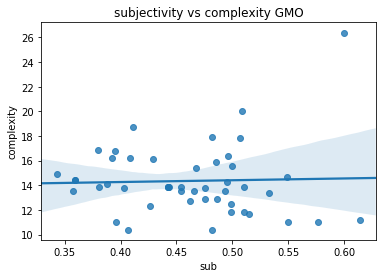

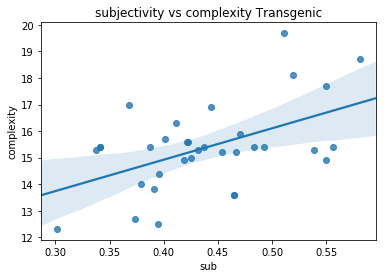

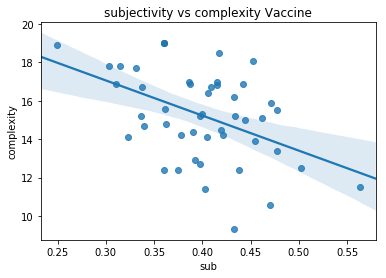

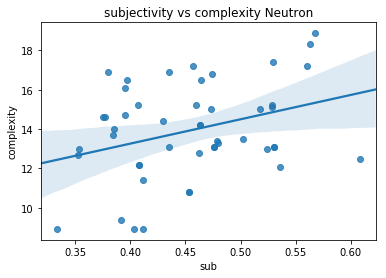

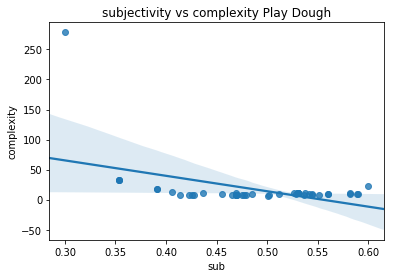

In [12]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
for outer,search_query in enumerate(QUERY_LIST):    
    complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] == search_query ]
    sub = [ f['urlDat']['ss'] for f in unravel if f['urlDat']['keyword'] == search_query ]
    if len(complexity)>0 and len(sent)>0:
        df = pd.DataFrame({'complexity': complexity,'sub': sub})
        plt.figure()
        plt.title(str('subjectivity vs complexity ')+str(search_query))
        ax = sns.regplot(x="sub",y="complexity", data=df)


legend = ax.legend(loc='upper center', shadow=True)
plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
plt.show()

In [ ]:



gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
bibg_text = list(filter(lambda x: x['urlDat']['se'] == 'bing_', crude_text))

for q in ENGINE_LIST:
    check = list(filter(lambda x: x['urlDat']['se'] == q, crude_text))

for q in QUERY_LIST:
    check = list(filter(lambda x: x['urlDat']['keyword'] == q, crude_text))
    
# total number of words
ents = ct['eofh']


droplist = []
droplist.append(ct.loc[10]['raw_text'])



In [ ]:
# Uncomment these lines to read in some raw text
# ct.loc[49]['raw_text']

In [ ]:
# Uncomment these lines to read in some raw text
# ct.loc[10]['raw_text']

In [ ]:
# Uncomment to see everything pretty printed
# ctu

# Unigram model expected value
Entropies of texts

In [ ]:
#print(unravel)
freqs = [  u['frequencies'] for u in unravel ]
freqs = [ (v,k) for f in freqs for k,v in f  ]
# create a dictionary of container keys with all values set to 0.
# Giant model is a federated model of histograms
giantmodel = { fs[0]:0 for fs in freqs }
# if fdict already has count data for that word/token add currently found count data to existing data.
for i in freqs:
    giantmodel[str(i[0])] = giantmodel[str(i[0])] + i[1]
    
wt = len(giantmodel)


In [ ]:

gm = sum([ v for k,v in giantmodel.items() ])    
probs = [ (float(v)/gm, k) for k,v in giantmodel.items() ]
probs = [ (p[0],p[1]) for p in probs if p[0] > 0.]
ents = {}
ent = 0
import math
for p in probs:
    if p[0] > 0.:
        ent -= p[0] * math.log(p[0], 2)
        ents[p[1]] = ent

#federate_frequencies =  []
yentropies = [ v['eofh'] for v in unravel ]
import numpy as np
print(np.mean(yentropies))
print(np.var(yentropies))

wns = [ x for x in range(0,len(ents)) ]
probs = [i[0] for i in probs]
import pandas as pd
d = {'words': wns, 'probs': probs}
df = pd.DataFrame(data=d)
ax = sns.regplot(x='words', y='probs', data=df)
plt.show()


In [ ]:
stat_items = [ f['urlDat'] for f in unravel ] 

unravel[0]['urlDat'];
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from scipy.stats import pearsonr
import numpy as np

rfr = RandomForestRegressor(n_estimators=25)
lm = LinearRegression()

features = [ list(c['urlDat'].values())[0:-1] for c in crude_text ]
feature_labels = [ list(c['urlDat'].keys())[0:-1] for c in crude_text ]

In [ ]:
# 3.       GMO/transgenics vs. text complexity
y = []
e = []
for outer,sq in enumerate(QUERY_LIST):    

    comp = sum([ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq])
    entropy = sum([ f['eofh'] for f in unravel if f['urlDat']['keyword'] ==sq  ])
    y.append(comp)
    e.append(entropy)
plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
ind = [i for i,v in enumerate(QUERY_LIST)]
offset = [(i+width) for i,v in enumerate(ind)]
rects1 = ax.bar(offset[0], y[0] , width, color='r')# yerr=men_std)
rects2 = ax.bar(offset[1], y[1], width, color='g')#, yerr=women_std)
rects3 = ax.bar(offset[2], y[2], width, color='r')#, yerr=women_std)
rects4 = ax.bar(offset[3], y[3], width, color='b')#, yerr=women_std)
rects5 = ax.bar(offset[4], y[4], width, color='g')#, yerr=women_std)
rects6 = ax.bar(offset[5], y[4], width, color='b')#, yerr=women_std)




# add some text for labels, title and axes ticks
ax.set_ylabel('Complexity')
ax.set_title('Readability by search query and Search Engine')

ax.legend([rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]], QUERY_LIST)
plt.show()
plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
rects1 = ax.bar(offset[0], e[0] , width, color='r')# yerr=men_std)
rects2 = ax.bar(offset[1], e[1], width, color='g')#, yerr=women_std)
rects3 = ax.bar(offset[2], e[2], width, color='r')#, yerr=women_std)
rects4 = ax.bar(offset[3], e[3], width, color='b')#, yerr=women_std)
rects5 = ax.bar(offset[4], e[4], width, color='g')#, yerr=women_std)
rects6 = ax.bar(offset[5], e[4], width, color='b')#, yerr=women_std)


ax.set_ylabel('Complexity')
ax.set_title('Entropy by search query and Search Engine')
ax.legend([rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]], QUERY_LIST)


plt.show()

In [ ]:

gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
ddg_text = list(filter(lambda x: x['urlDat']['se'] == 'duckduckgo_', crude_text))
bing_text = list(filter(lambda x: x['urlDat']['se'] == 'bing_', crude_text))
gword_names = [ c['urlDat']['keyword'] for c in gsc_text ]
#print(gword_names)
gsc_entropies = [e['eofh'] for e in gsc_text if e['urlDat']['se'] == 'gScholar_' ]
bing_entropies = [e['eofh'] for e in bing_text if e['urlDat']['se'] == 'bing_']
ddg_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'duckduckgo_'] 
yahoo_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'yahoo_'] 
google_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'google_'] 

wns = [ x for x in range(0,len(gsc_text)) ]
plt.clf()
fig, ax = plt.subplots()

plt.plot([ x for x in range(0,len(gsc_entropies)) ],gsc_entropies,label='google scholar')
plt.plot([ x for x in range(0,len(bing_entropies)) ],bing_entropies,label='bing')
plt.plot([ x for x in range(0,len(ddg_entropies)) ],ddg_entropies,label='duck duck go')
plt.plot([ x for x in range(0,len(yahoo_entropies)) ],yahoo_entropies,label='yahoo')
plt.plot([ x for x in range(0,len(google_entropies)) ],google_entropies,label='google')
legend = ax.legend(loc='upper center')

plt.show()

all_entropies = [e['eofh'] for e in crude_text ] 
all_entropies = [e['eofh'] for e in crude_text ] 
plt.clf()
plt.plot([i for i,j in enumerate(all_entropies)],all_entropies)
plt.title('all entropies')
plt.show()
all_polarities =[e['urlDat']['sp'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_polarities)],all_polarities)
plt.title('all polarities')
plt.show()
print(len(unravel))
print(np.shape(unravel))


all_subjectivities =[e['urlDat']['ss'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_subjectivities)],all_subjectivities)
plt.title('all subjectivities')
plt.show()


In [ ]:

      
Xs = []
y = []    
for i in features:
    temp = []      
    for k,j in enumerate(i[:-2]):
        if type(j) is not type(str()):
            temp.append(j)
        elif y==3:
            y.append(j)
    Xs.append(temp)          
      
features = np.array(Xs)



print(len(Xs),len(yentropies))
target = yentropies
regressor = rfr.fit(features,target)
lm = lm.fit(features,yentropies)

print('linear model regression')
print(lm.score(features,yentropies))
print('random forest regression')
print(regressor.score(features,target))

regressor.verbose = 1
print(regressor)
from sklearn.linear_model import LinearRegression,Lasso

def scorer(est,X,y):
    """Computes the Pearson correlation between predicted and observed values"""
    predicted = est.predict(X).squeeze()
    actual = y.squeeze()
    if predicted.var()==0:
        r = 0
    else:
        r,p = pearsonr(predicted,actual)    
    return r



In [ ]:
features[0]

In [ ]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
#!pip install ipyvolume
from mpl_toolkits.mplot3d import Axes3D
#import ipyvolume.pylab as p3

pca = PCA()
data = features
print(np.shape(features))
pca = PCA(n_components=13).fit(data)
data_rotated = np.dot(pca.components_,data.T).T


        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))
name='word_complexity'
#summarize(data_rotated,name)        
#report_mean_var(data_rotated)

def variance_explained(df,pca):
    #pca.fit(df.values)
    n_components = min(*df.shape)
    if pca.n_components:
        n_components = min(n_components,pca.n_components)
    for i in range(n_components):
        print("PC %d explains %.3g%% of the variance" % (i+1,100*pca.explained_variance_ratio_[i]))

variance_explained(pd.DataFrame(data_rotated),pca)

reduced_dims = pca.components_#* data 
def annotate_scatter(ax,df_transformed,df):
    for i, txt in enumerate(df.index):
        x_loc = df_transformed['PC 1'].iloc[i]
        y_loc = df_transformed['PC 2'].iloc[i]
        ax.annotate(txt, (x_loc,y_loc), fontsize=9)
    #for i, text in enumerate(df.index):
    #    ax.text(df['PC 1'].iloc[i],df['PC 2'].iloc[i], text)
        
def plot_transformed_data(pca,df_transformed,df,figsize=None):
    plt.clf()
    #pca.fit(df.values)
    n_components = min(*df.shape)
    if pca.n_components:
        n_components = min(n_components,pca.n_components)
    pca_df = pd.DataFrame(pca.transform(df.values),
                      index=df.index,
                      columns=['PC %d' % (i+1) for i in range(n_components)])
    ax = pca_df.plot.scatter('PC 1','PC 2',figsize=figsize)
    #ax = mds_df.plot.scatter(x='PC 1',y='PC 2',figsize=(12,12))
    #annotate_scatter(ax,mds_df)
    annotate_scatter(ax,pca_df,df_transformed)
    plt.show()
    

plot_transformed_data(pca,pd.DataFrame(data),pd.DataFrame(data_rotated))
        
def plot3d(df):
    plt.clf()
    data = df.values
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*data[:,0:3].T)
    minn,maxx = data.min(),data.max()
    ax.set_xlim(minn,maxx)
    ax.set_ylim(minn,maxx)
    ax.set_zlim(minn,maxx)
    ax.set_xlabel(df.columns[0],labelpad=10)
    ax.set_ylabel(df.columns[1],labelpad=10)
    ax.set_zlabel(df.columns[2],labelpad=10)
    ax.dist = 12
    plt.tight_layout()    
    plt.show()
plot3d(pd.DataFrame(data_rotated))   



In [ ]:
print(reduced_dims[0])
print(reduced_dims[1])
print(data[0])

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
km = KMeans(n_clusters=4)
#km.labels_
clustered = km.fit(features)


fignum = 1

plt.clf()
plt.title('K means auto clustering')
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(features[:, 3], features[:, 0], features[:, 2], edgecolor='k')

#ax.w_xaxis.set_ticklabels(clustered.labels_)
#ax.w_yaxis.set_ticklabels(clustered.labels_)
#ax.w_zaxis.set_ticklabels(clustered.labels_)
ax.set_xlabel('what is this dim?')
ax.set_ylabel('what is this dim?')
ax.set_zlabel('what is this dim?')
#ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1
plt.show()


In [ ]:
def my_dendrogram(features,color_threshold,truncate_mode=None,labels=None,no_labels=False,leaf_font_size=14):
    plt.figure(figsize=(17,7))
    Z = linkage(features,method='ward')
    Z[:,2] = Z[:,2]**0.25 # Warp distance for visualization purposes
    dendrogram(
        Z,
        truncate_mode=truncate_mode,  # show only the last p merged clusters
        p=25,  # show only the last p merged clusters
        color_threshold=color_threshold,
        above_threshold_color='black',
        leaf_font_size=leaf_font_size,
        labels=labels,
        no_labels=no_labels,
    );
    plt.ylabel('Intercluster distance')
    if not no_labels:
        plt.xlabel('Cluster sizes');
    plt.show()    
#my_dendrogram(features,1.2,no_labels=True)        

In [ ]:
bings = [ f for f in unravel if f['urlDat']['se'] =='bing_']
googles = [ f for f in unravel if f['urlDat']['se'] =='google_']
GMOs = [ f for f in unravel if f['urlDat']['keyword'] =='GMO']
GMO_standard = [ f['urlDat']['standard'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_pol = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_sent = [ f['urlDat']['ss'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
crude_text = [ f for f in unravel ] 
stat_items = [ f['urlDat'] for f in unravel ] 
gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
unravel[0]['urlDat']
gsc = list(filter(lambda x: x['se'] == 'gScholar_', stat_items))
scholar_wc = [ f['wcount'] for f in gsc ] 